# Linear Classifier in pure TensorFlow

## 3.13 무작위 포인트로 2개의 클래스 생성

In [1]:
import numpy as np

num_samples_per_class = 1000

# Generate separated class of points:
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class,
)

positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class,
)


## 3.14 한 개의 array로 변환 : float64 -> float32

In [2]:
print(negative_samples.dtype)

float64


In [3]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

## 3.15 negative target = 0, positive target = 1 로 타겟 데이터를 만듦

In [4]:
negative_targets = np.zeros((num_samples_per_class, 1))
positive_targets = np.ones((num_samples_per_class, 1))

targets = np.vstack((negative_targets, positive_targets)).astype(np.float32)

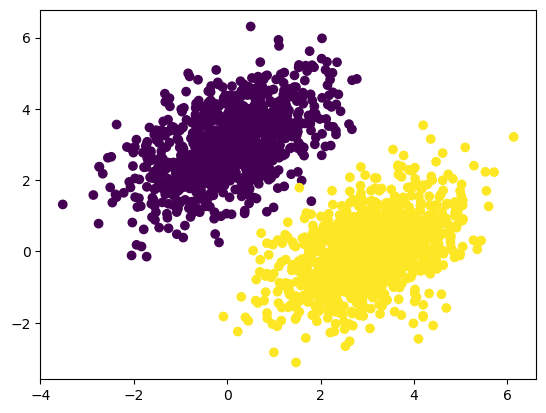

In [5]:
# Plotting
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

## 3.17 선형 분류를 위한 변수 생성

In [6]:
import tensorflow as tf

input_dim = 2
output_dim = 1

W = tf.Variable(
    initial_value=tf.random.uniform(shape=[input_dim, output_dim], dtype=tf.float32),
)
b = tf.Variable(
    initial_value=tf.zeros(shape=[output_dim], dtype=tf.float32),
)

2025-02-08 23:04:37.363451: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-02-08 23:04:37.363656: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-02-08 23:04:37.363661: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-02-08 23:04:37.364046: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-08 23:04:37.364057: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 3.18 Forward pass function

In [7]:
def model(inputs):
    return tf.matmul(inputs, W) + b

## 3.19 Loss function

In [8]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

## 3.20 Training step

In [9]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)

    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

## 3.21 배치처리

In [10]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.4557
Loss at step 1: 0.0873
Loss at step 2: 0.0694
Loss at step 3: 0.0641
Loss at step 4: 0.0607
Loss at step 5: 0.0577
Loss at step 6: 0.0550
Loss at step 7: 0.0525
Loss at step 8: 0.0503
Loss at step 9: 0.0482
Loss at step 10: 0.0463
Loss at step 11: 0.0446
Loss at step 12: 0.0430
Loss at step 13: 0.0415
Loss at step 14: 0.0402
Loss at step 15: 0.0389
Loss at step 16: 0.0378
Loss at step 17: 0.0368
Loss at step 18: 0.0358
Loss at step 19: 0.0349
Loss at step 20: 0.0341
Loss at step 21: 0.0334
Loss at step 22: 0.0327
Loss at step 23: 0.0321
Loss at step 24: 0.0316
Loss at step 25: 0.0310
Loss at step 26: 0.0306
Loss at step 27: 0.0301
Loss at step 28: 0.0297
Loss at step 29: 0.0294
Loss at step 30: 0.0290
Loss at step 31: 0.0287
Loss at step 32: 0.0285
Loss at step 33: 0.0282
Loss at step 34: 0.0280
Loss at step 35: 0.0277
Loss at step 36: 0.0276
Loss at step 37: 0.0274
Loss at step 38: 0.0272
Loss at step 39: 0.0271


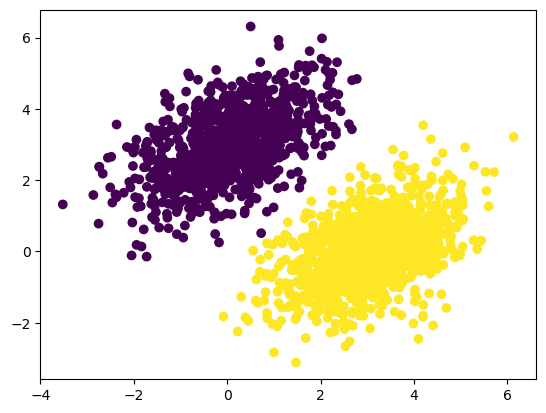

In [11]:
# Plotting the results
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5)
plt.show()

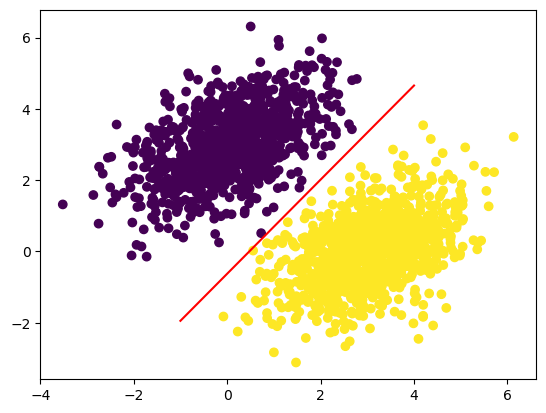

In [12]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
